## Analysis of the data related job market in Australia 

The Python script is to analyse Australian data job market using cleaned up data scraped from an Australian famous job hunting website. 
The following questions will be answered:
1. Which Australian major city has most job positions?
2. Which industry needs to analyse data?
3. What types of jobs are available? 
4. What jobs pay what salary in different cities?
5. What skills are required to get a job in the data analysis/science/engineer field?


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

from wordcloud import WordCloud, STOPWORDS

In [2]:
# Read cleaned data from excel file
file_name = 'cleandatav3 - Copy.xlsx'
df = pd.read_excel(file_name, index_col = 0)

# Take a look at the first few rows, data types, and data shape
df.head()

,Job_title_type,Company,Location,Mid_salary,Industry,Job_information
0,Data Analyst,Ergo Strategy,Sydney,59999.5,Marketing & Communications,About the business Small but mighty – our te...
1,Data Analyst,BNK Banking Corporation Limited,Perth,NaN,Information & Communication Technology,BNK Banking Corporation Limited (BNK) is a new...
2,Data Analyst,Douglass Hanly Moir Pathology,Sydney,NaN,Information & Communication Technology,A full-time position is available for a Data A...
3,Data Analyst,"Sharp & Carter NSW Technology, Projects and Di...",Sydney,90000.0,Information & Communication Technology,This well established company has a start-up c...
4,Business Intelligence,Kennards Hire,Sydney,NaN,Banking & Financial Services,12 Month Fixed Term ContractGreat Company Cult...


In [3]:
df.dtypes

Job_title_type      object
Company             object
Location            object
Mid_salary         float64
Industry            object
Job_information     object
dtype: object

In [4]:
df.shape

(2350, 6)

Q1: Which Australian major city has most job positions?

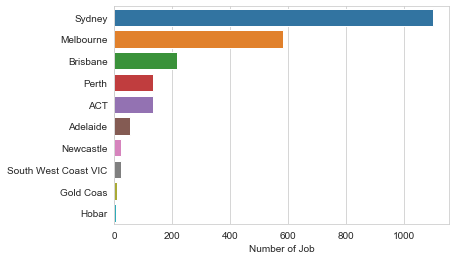

In [5]:
sns.set_style("whitegrid")
plt.figure()
sns.barplot(df.Location.value_counts().values[:10],df.Location.value_counts().index[:10]).set(xlabel='Number of Job')
plt.savefig('city vs job number')

Q2: Which industry needs data analysis employees?

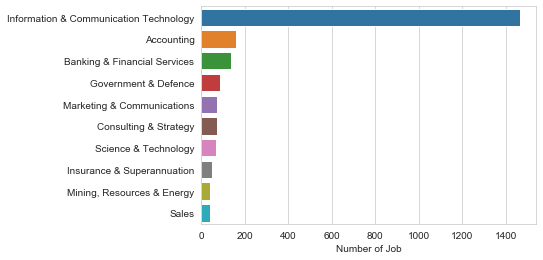

In [6]:
plt.figure()
sns.barplot(df.Industry.value_counts().values[:10],df.Industry.value_counts().index[:10]).set(xlabel='Number of Job')
plt.savefig('industry vs job number')

Q3: What types of jobs are available? 

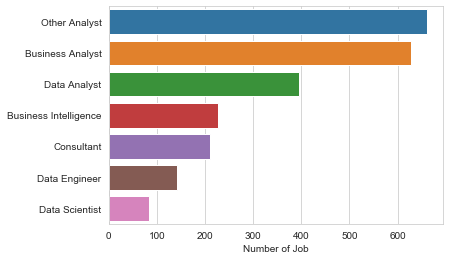

In [7]:
plt.figure()
sns.barplot(df.Job_title_type.value_counts().values,df.Job_title_type.value_counts().index).set(xlabel='Number of Job')
plt.savefig('job type')

Q4: What jobs pay what salary in different cities?

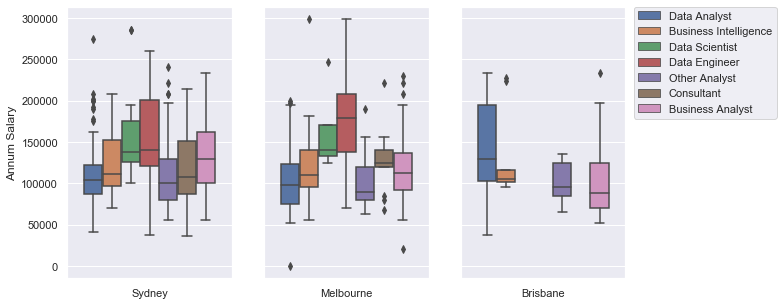

In [8]:
sns.set()
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5), sharey=True)

sns.boxplot(x= df.loc[df.Location == 'Sydney','Location'], y='Mid_salary', data= df, hue = df.Job_title_type, ax=axes[0]).set(xlabel='',ylabel = 'Annum Salary')
axes[0].get_legend().remove()

sns.boxplot(x= df.loc[df.Location == 'Melbourne','Location'], y='Mid_salary', data= df, hue = df.Job_title_type, ax=axes[1]).set(xlabel='',ylabel = '')
axes[1].get_legend().remove()

sns.boxplot(x= df.loc[df.Location == 'Brisbane','Location'], y='Mid_salary', data= df, hue = df.Job_title_type, ax=axes[2]).set(xlabel='',ylabel = '')
axes[2].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.savefig('annum salary')


Q5: What skills are required to get a job in the data analysis/science/engineer field?

In [9]:
# Preprocess and normalise the job information text using nltk library
import nltk
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()  

# Lemmatise the text
def lemmaSentence(sentence):
    '''Lemma job information words, 
    Input: sentence intend to be lemmatised;
    Output: lemmatised sentence'''
    
    punctuations="?:!.,;"
    sentence_words = nltk.word_tokenize(sentence)
    for word in sentence_words:
        if word in punctuations:
            sentence_words.remove(word)

        lemma_sentence=[]

        for word in sentence_words:
            lemma_sentence.append(wordnet_lemmatizer.lemmatize(word, pos="n"))
            lemma_sentence.append(" ")
    return "".join(lemma_sentence)

# Draw wordcloud to check the job requirements
def jobwordcloud(text,name):
    '''Plot word cloud for different type of job 
    Input: Words used for plot
    Output: the wordcloud '''

    stopwords = ['will', 'well','within','work','working','way','engineer','hand','great',
                     'service','support','system','solution','solutions','strong','skill','skills','stakeholder',
                     'customer','client','contact','company','career','commercial','create','capability','complex','candidate',
                     'people','project','please','provide','part','platform','product','position','performance',
                     'business','big','development','deliver','delivery','develop','driven','drive','design',
                     'issue','include','including','industry','insight','key','understanding',
                     'need','new','lead','management','outcome','based','essential', 'quality',
                     're','report','required','role','relevant','range','responsible','responsibility',
                 'requirement','recommendation','reporting','risk','manager','health',
                     'technique','technology','make','focus','experience','ensure','environment','exposure',
                     'assist','australia','apply','analysis','analyst','analytic','analytical','analytics','across','ability','application','advanced','around',
                     'team','technical','tool','tools','data','knowledge','information','use','using','understand',
                     'year','looking','level','demonstrated','build','building','benefit','best','us','one','offer','opportunity','organisation','end',
                     'value','job','au','australian','scientist','science','success','want','exciting','etc','must','help','year','join','closely','high',
                     'now','member','group','financial','ha','model','professional','ll','successful','good','better','highly','ideally','process','via'
                    ]
    stopwords = stopwords + list(STOPWORDS)

    wordcloud = WordCloud(#width = 600, height = 600, 
                    background_color ='white', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(text) 

    # plot the WordCloud image                        
    plt.figure(figsize = (6, 6), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 
   
    return name



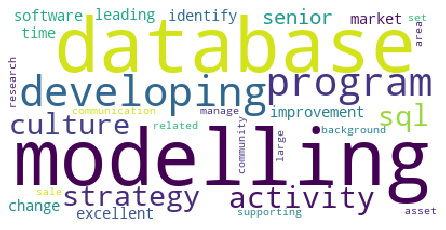

'Data Analyst'

In [10]:
#Requirement for Data Analyst

job_name = 'Data Analyst'
test = ''''''

for text in df[df['Job_title_type']== job_name].Job_information:
    test = lemmaSentence(text.lower().replace('\n',' ').replace('\xa0', ' ')) + test


jobwordcloud(test,job_name)

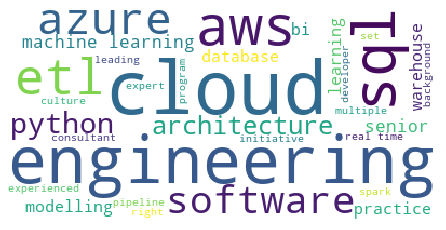

'Data Engineer'

In [11]:
job_name = 'Data Engineer'
test = ''''''

for text in df[df['Job_title_type']== job_name].Job_information:
    test = lemmaSentence(text.lower().replace('\n',' ').replace('\xa0', ' ')) + test


jobwordcloud(test,job_name)

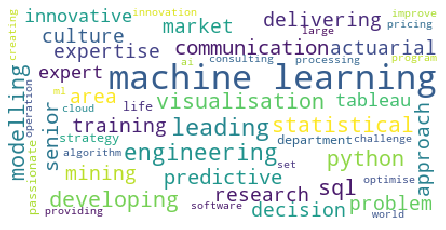

'Data Scientist'

In [12]:
job_name = 'Data Scientist'
test = ''''''

for text in df[df['Job_title_type']== job_name].Job_information:
    test = lemmaSentence(text.lower().replace('\n',' ').replace('\xa0', ' ')) + test


jobwordcloud(test,job_name)